# Name:

## Kala Sri Naga Sai Gopala Krishna
## Nandini Shankar

### Performing all the steps from Train_Test.ipynb to get pre-processed and scaled data

# Read the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_excel('Volve.xlsx', sheet_name = 'well 2')

In [3]:
df2 = pd.read_excel('Volve.xlsx', sheet_name = 'well 3')

In [4]:
df = pd.concat([df1, df2], axis=0)

In [5]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN


In [6]:
df

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN
...,...,...,...,...,...,...,...
1154,4083.5,15,59.7060,1.7590,2.4851,0.1416,CB
1155,4084.0,15,58.4170,1.6510,2.4860,0.1416,CB
1156,4084.5,15,57.4990,1.5970,2.5311,0.1527,CB
1157,4085.0,15,56.7850,1.4820,2.4731,0.1785,CB


In [7]:
df.describe()

,Depth,Well,GR,RT,RHOB,NPHI
count,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000
mean,3733.609380,14.357606,51.379917,4.292569,2.432688,0.207456
std,265.253354,0.479369,57.700965,14.524740,0.147662,0.104241
min,3178.500000,14.000000,3.655000,0.094000,1.805100,0.013500
25%,3542.000000,14.000000,17.433000,1.014000,2.311000,0.133600
50%,3747.500000,14.000000,34.083600,1.864900,2.459000,0.187900
75%,3950.500000,15.000000,71.846000,3.697700,2.550000,0.267500
max,4220.500000,15.000000,1567.590000,461.170000,3.149300,0.853200


In [8]:
df.isna().any(axis = 0)

Depth     False
Well      False
GR        False
RT        False
RHOB      False
NPHI      False
Facies    False
dtype: bool

# There are no Null Values in the Dataset
# Encoding the target

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Facies']=label_encoder.fit_transform(df['Facies'])

a

In [10]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the label mapping
print(label_mapping)

{'CB': 0, 'SH': 1, 'SS': 2, 'UN': 3}


In [11]:
df.columns

Index(['Depth', 'Well', 'GR', 'RT', 'RHOB', 'NPHI', 'Facies'], dtype='object')

In [12]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,3
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,3
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,3


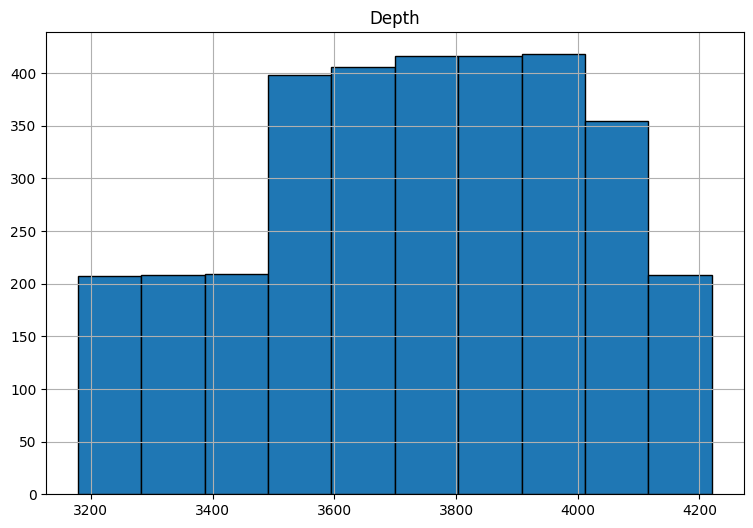

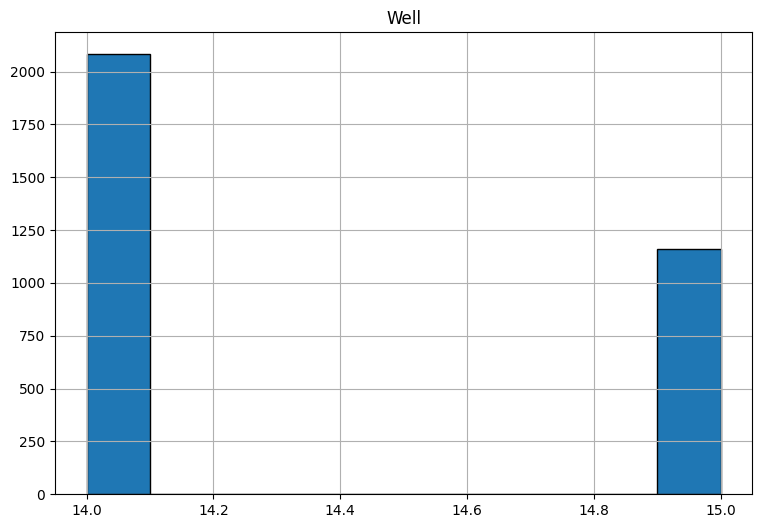

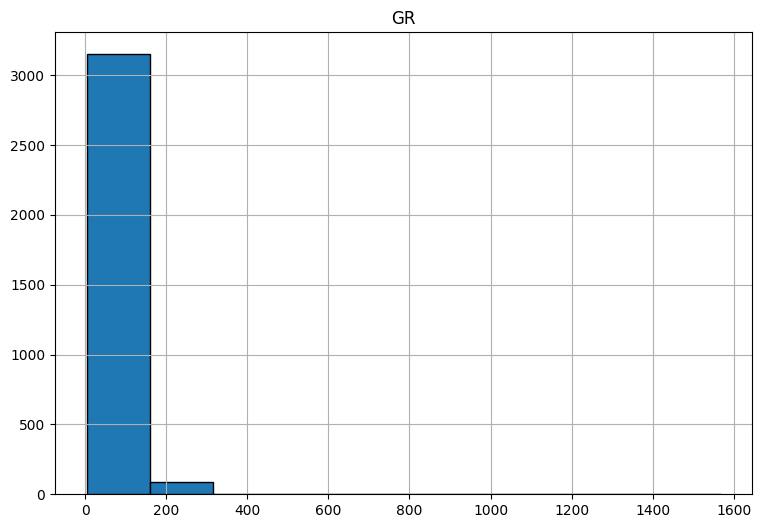

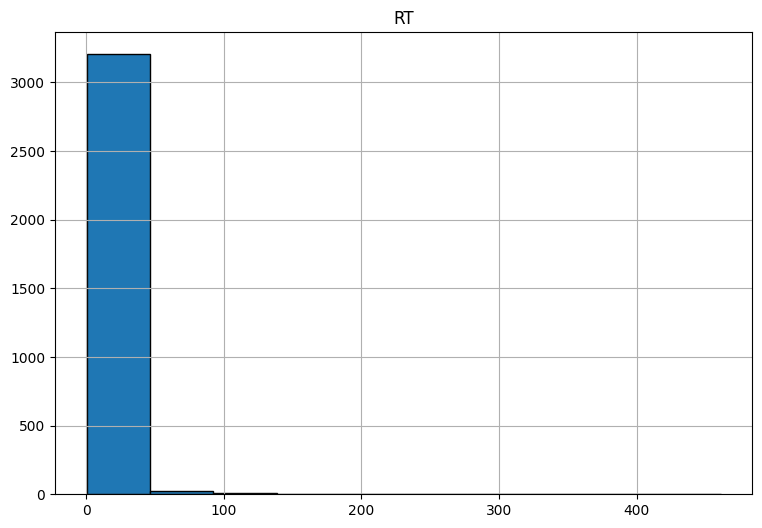

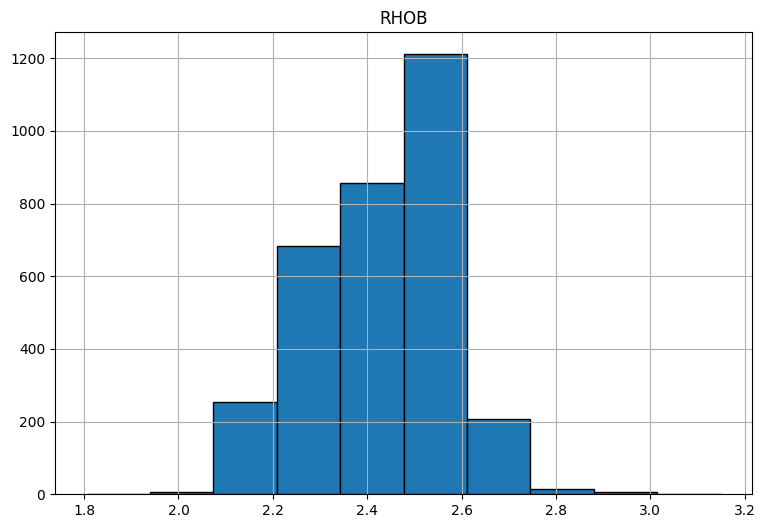

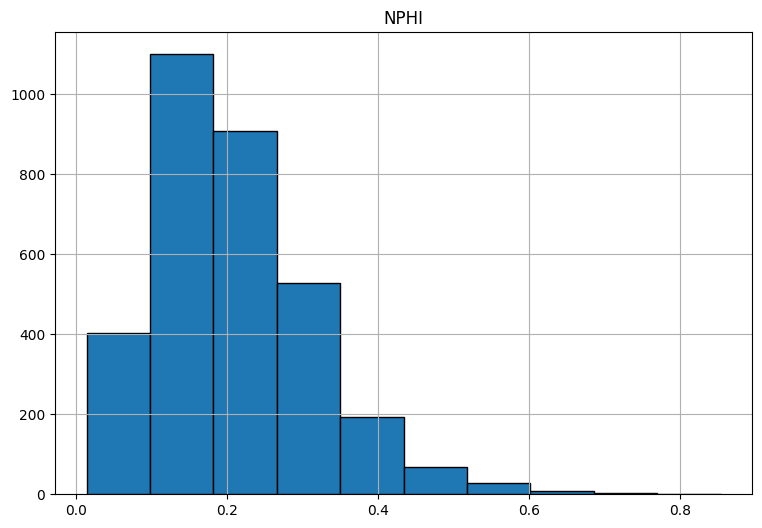

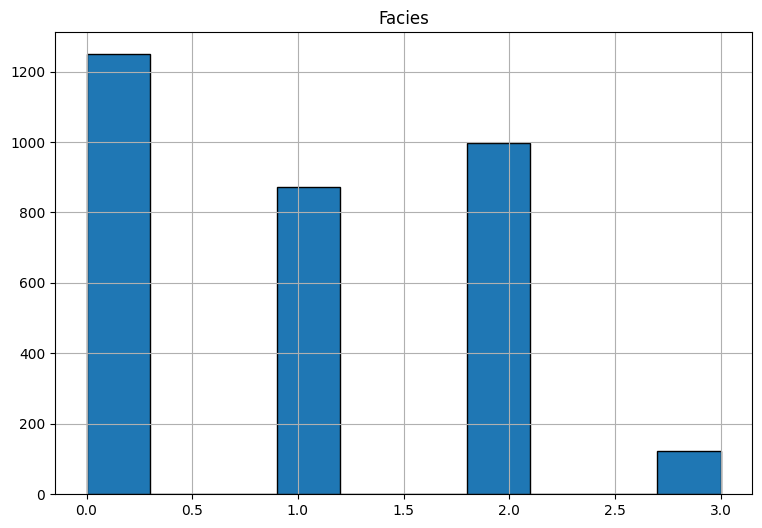

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    plt.figure(figsize=(9, 6))
    #sns.histplot(df[column], kde=True)
    df[column].hist(edgecolor='black')
    plt.title(column)
    plt.show()

### Converting features that are skewed to log to normalize them

In [14]:
#df['GR'] = np.log(df['GR'])
#df['RT'] = np.log(df['RT'])
#df['NPHI'] = np.log(df['NPHI'])


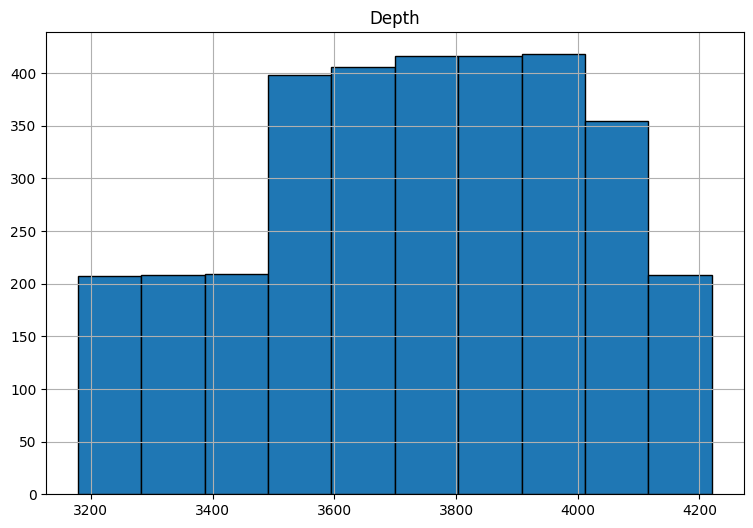

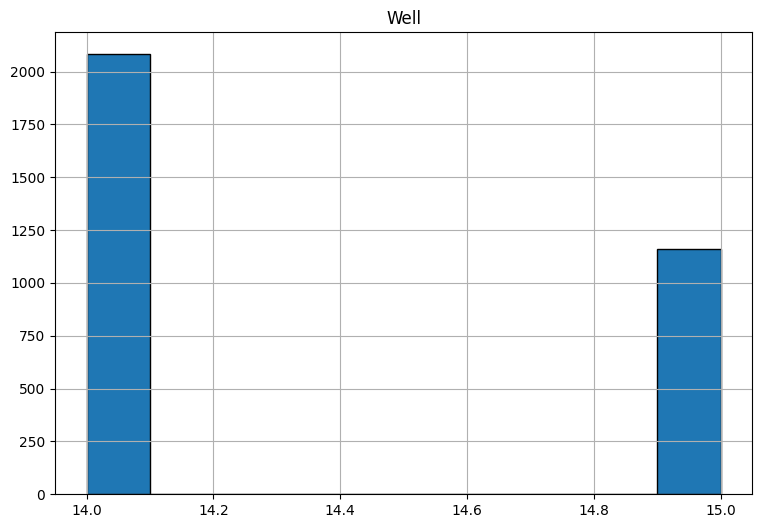

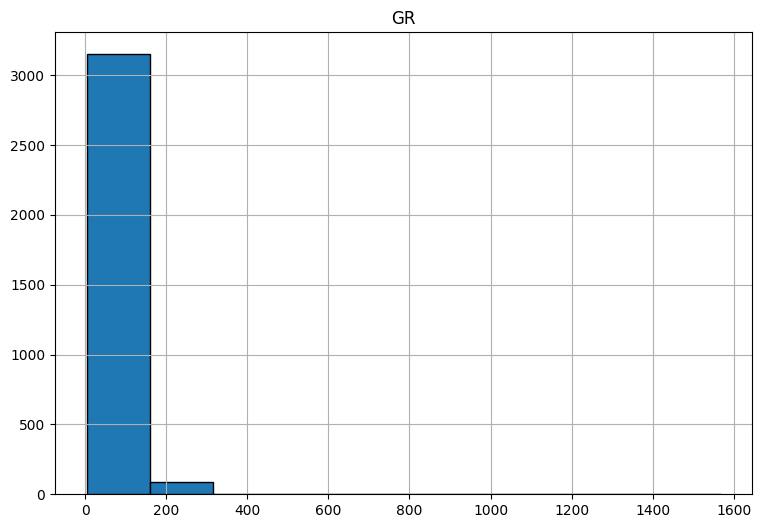

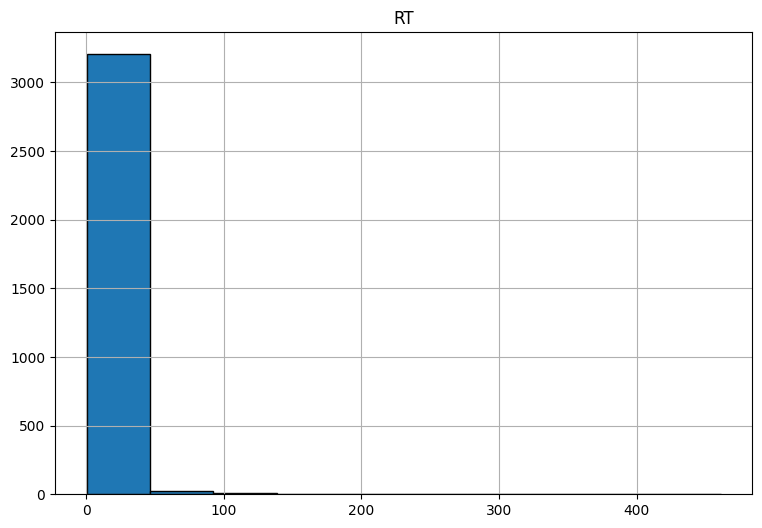

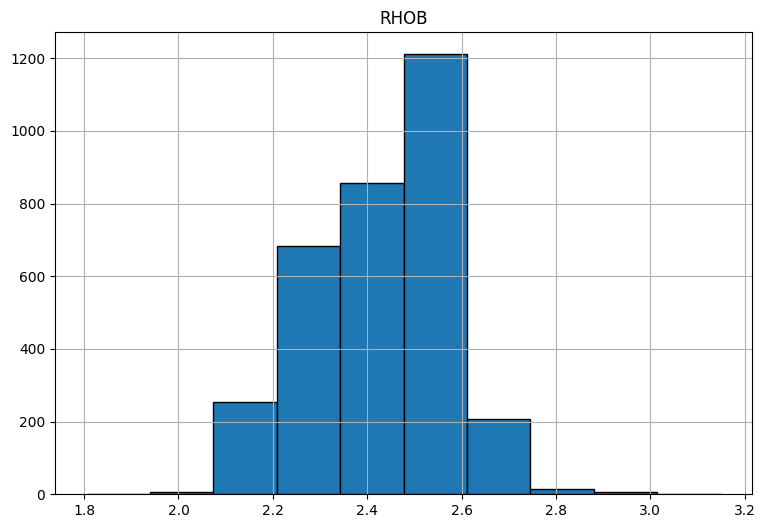

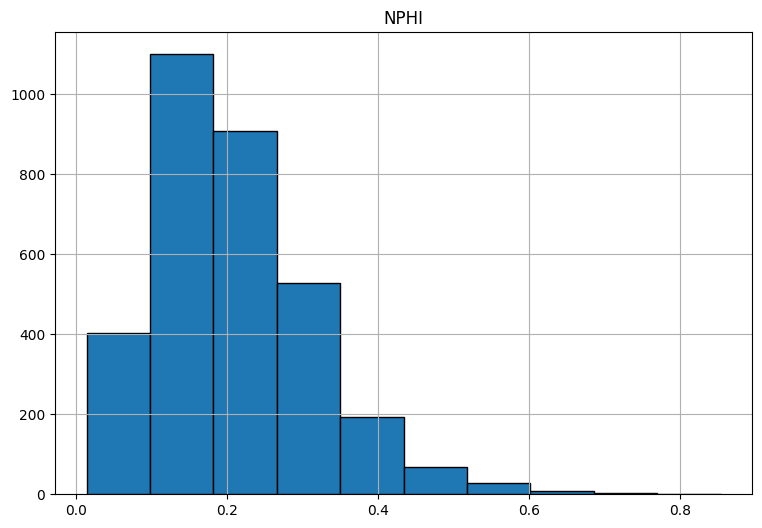

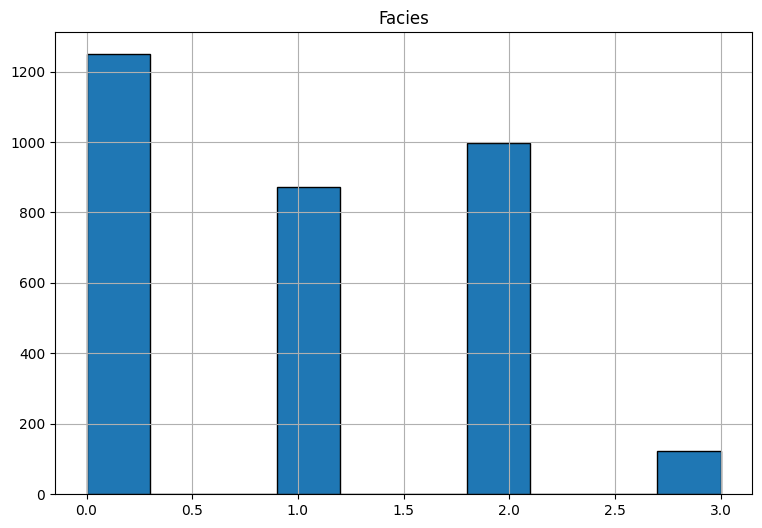

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    plt.figure(figsize=(9, 6))
    #sns.histplot(df[column], kde=True)
    df[column].hist(edgecolor='black')
    plt.title(column)
    plt.show()

### From the graphs above we can see that features are normalized

# Creating 2 new features

In [16]:
df['RTOB'] = np.log((df['RT'] * (df['RHOB'])))


In [17]:
df['RHPI'] = df['RHOB'] - (df['NPHI']**2)




In [18]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RTOB,RHPI
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,0.316028,2.195864
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,3,0.587701,2.174418
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.899481,2.005479
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,3,1.180353,1.950877
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,3,0.774351,2.015642


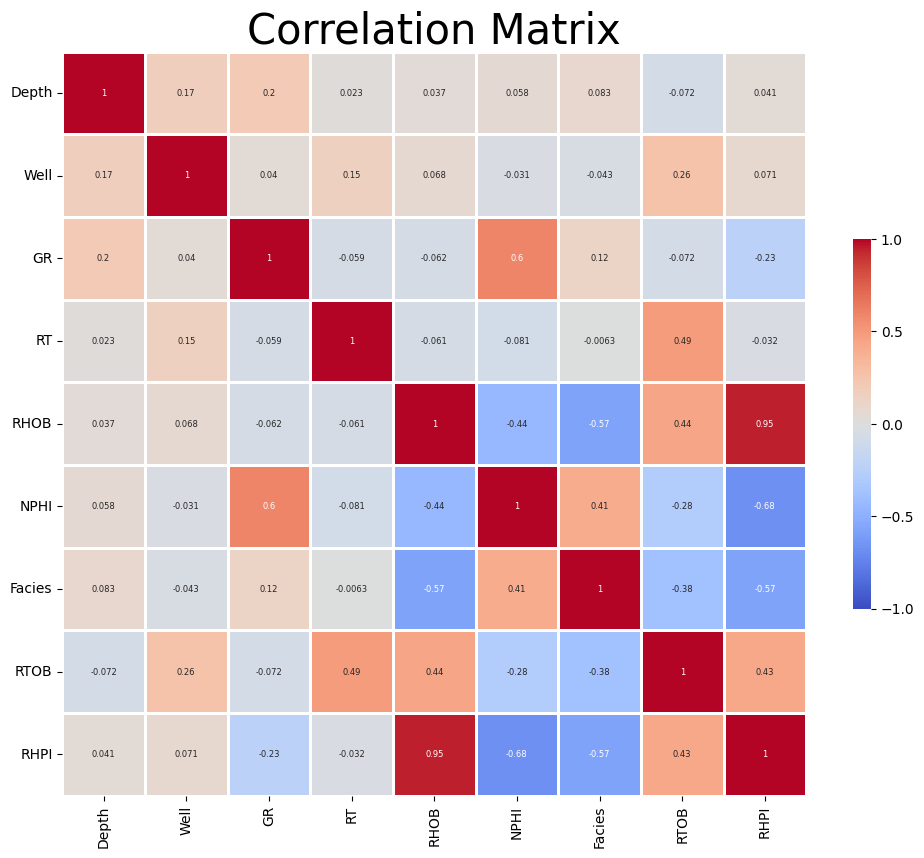

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = df.corr(method = "pearson")

fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix,  square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 10)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =10)
ax.set_title("Correlation Matrix", size = 30)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [20]:
df[df.columns[1:]].corr()['Facies'][:]

Well     -0.043091
GR        0.123834
RT       -0.006271
RHOB     -0.571477
NPHI      0.405681
Facies    1.000000
RTOB     -0.375306
RHPI     -0.571712
Name: Facies, dtype: float64

### As we can see that the two new features created are not weakly correlated

In [21]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RTOB,RHPI
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,0.316028,2.195864
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,3,0.587701,2.174418
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.899481,2.005479
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,3,1.180353,1.950877
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,3,0.774351,2.015642


# Perform all preprocessing: outlier detection, scaling, co-linearity check (Pearson), association
# test (F-test and Mutual Information), and feature transformation (Quantile Transformer). – 2

### Outlier Detection and Removal

In [22]:
from sklearn.ensemble import IsolationForest

In [23]:
outliers_fraction = 0.02

In [24]:
df.shape

(3241, 9)

In [25]:
from sklearn import preprocessing
import seaborn

In [26]:
model =  IsolationForest(n_estimators=300, max_samples = 0.8, max_features= 0.8, contamination = outliers_fraction)

model.fit(df)

C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.02, max_features=0.8, max_samples=0.8,
                n_estimators=300)

In [27]:
model.predict(df)

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
df['anomaly'] = model.predict(df)

In [29]:
df['anomaly'] = df['anomaly'].map( {1: 0, -1: 1})  
                # map 1 to 0 and -1 to 1....so, 1 is outlier

print(df['anomaly'].value_counts())

0    3176
1      65
Name: anomaly, dtype: int64


In [30]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RTOB,RHPI,anomaly
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,0.316028,2.195864,0
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,3,0.587701,2.174418,0
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.899481,2.005479,0
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,3,1.180353,1.950877,1
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,3,0.774351,2.015642,0


In [31]:
df = df[df['anomaly'] != 1]

In [32]:
df.shape

(3176, 10)

In [33]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RTOB,RHPI,anomaly
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,0.316028,2.195864,0
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,3,0.587701,2.174418,0
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.899481,2.005479,0
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,3,0.774351,2.015642,0
5,3181.0,14,49.0612,0.5514,2.2463,0.4549,1,0.213990,2.039366,0


In [34]:
df = df.drop('anomaly', axis =1)

In [35]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RTOB,RHPI
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,0.316028,2.195864
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,3,0.587701,2.174418
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.899481,2.005479
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,3,0.774351,2.015642
5,3181.0,14,49.0612,0.5514,2.2463,0.4549,1,0.213990,2.039366


In [36]:
X = df.drop('Facies', axis =1)

In [37]:
y = df['Facies']

### Splitting data into Training and Testing

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42, stratify=y)

In [40]:
# Create an instance of QuantileTransformer
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(n_quantiles=1000, output_distribution='uniform', random_state=0)

# List of columns to transform
cols_to_transform = X_train.columns

# Apply the Quantile Transformer to the specified columns
X_train[cols_to_transform] = quantile_transformer.fit_transform(X_train[cols_to_transform])

X_test[cols_to_transform] = quantile_transformer.transform(X_test[cols_to_transform])

In [41]:
type(X_test)

pandas.core.frame.DataFrame

## Performing Pearson Correlation and removing features > 0.9 co-linearity

In [42]:
corr_matrix = X_train.corr(method = "pearson")

In [43]:
corr_matrix.head()

,Depth,Well,GR,RT,RHOB,NPHI,RTOB,RHPI
Depth,1.000000,0.155480,0.381446,-0.231737,-0.111437,0.198312,-0.225302,-0.113197
Well,0.155480,1.000000,0.118434,0.209134,0.064401,-0.022719,0.208652,0.069643
GR,0.381446,0.118434,1.000000,-0.262166,-0.243174,0.803234,-0.271943,-0.381221
RT,-0.231737,0.209134,-0.262166,1.000000,0.530465,-0.427896,0.998961,0.526410
RHOB,-0.111437,0.064401,-0.243174,0.530465,1.000000,-0.541634,0.557042,0.974516


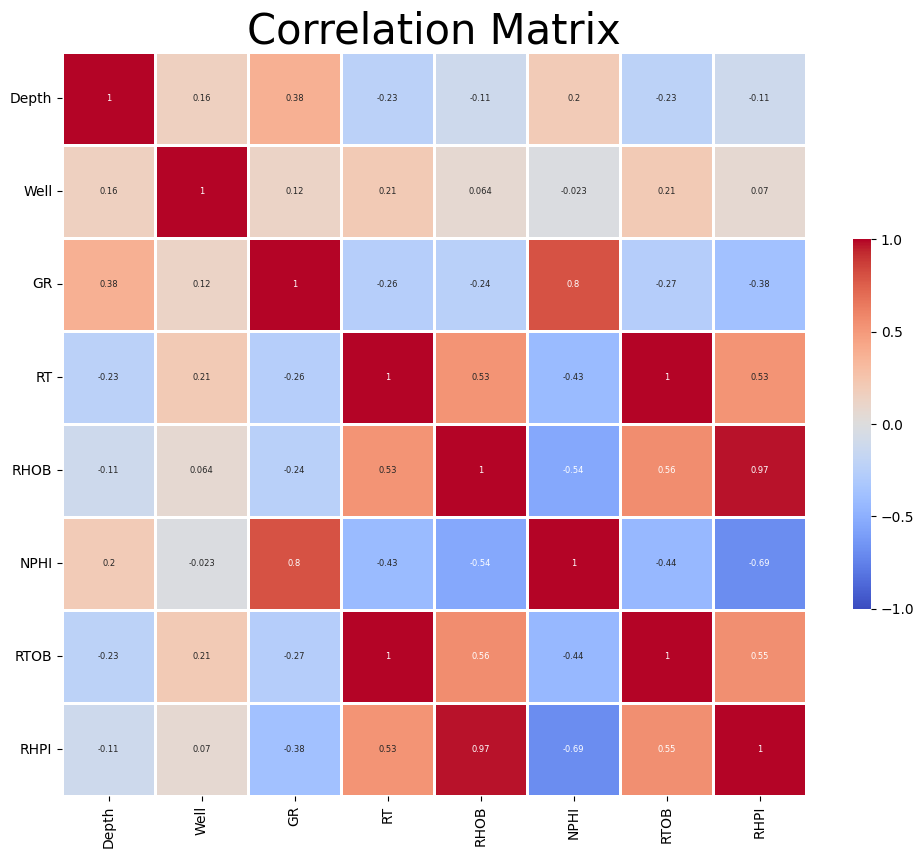

In [44]:
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix,  square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 10)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =10)
ax.set_title("Correlation Matrix", size = 30)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [45]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  ##  indices for the upper-triangle

C:\Users\Gopala Kala\AppData\Local\Temp\ipykernel_5228\2141870208.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


In [46]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

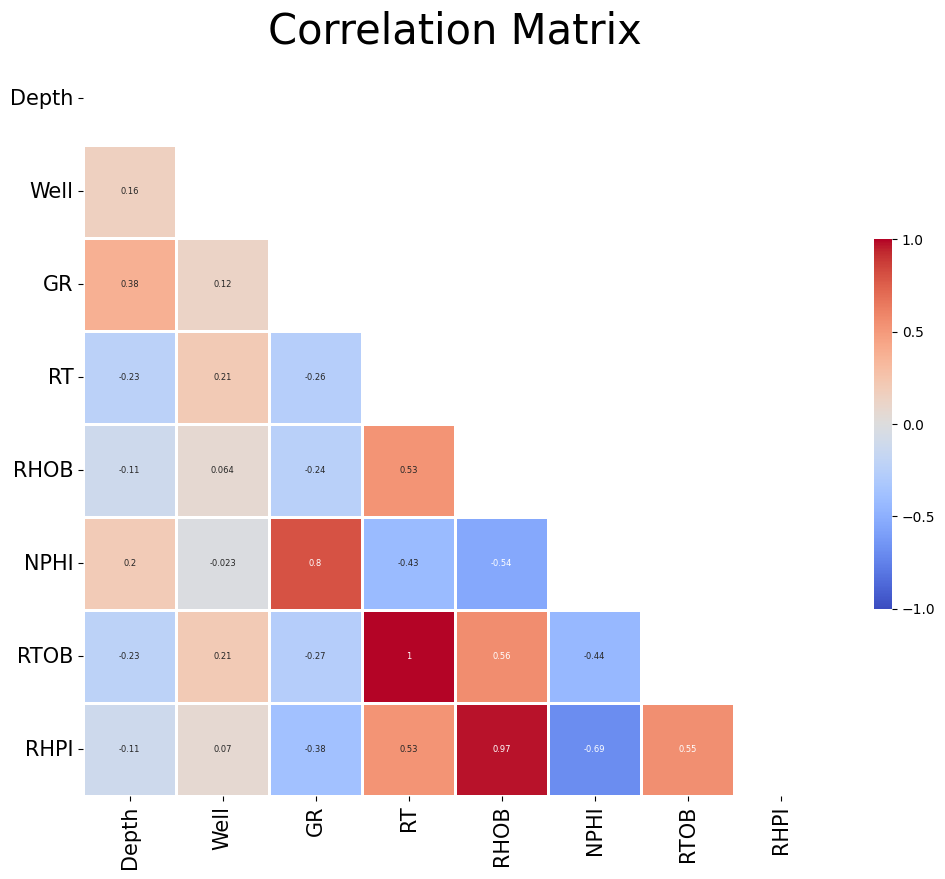

In [47]:
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix, mask = mask, square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 15)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix", size = 30)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [48]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


to_drop = [column for column in upper.columns if any(abs(upper[column]) >= (0.9))]

In [49]:
to_drop

['RTOB', 'RHPI']

In [50]:
X_train.drop(to_drop, axis=1, inplace=True)

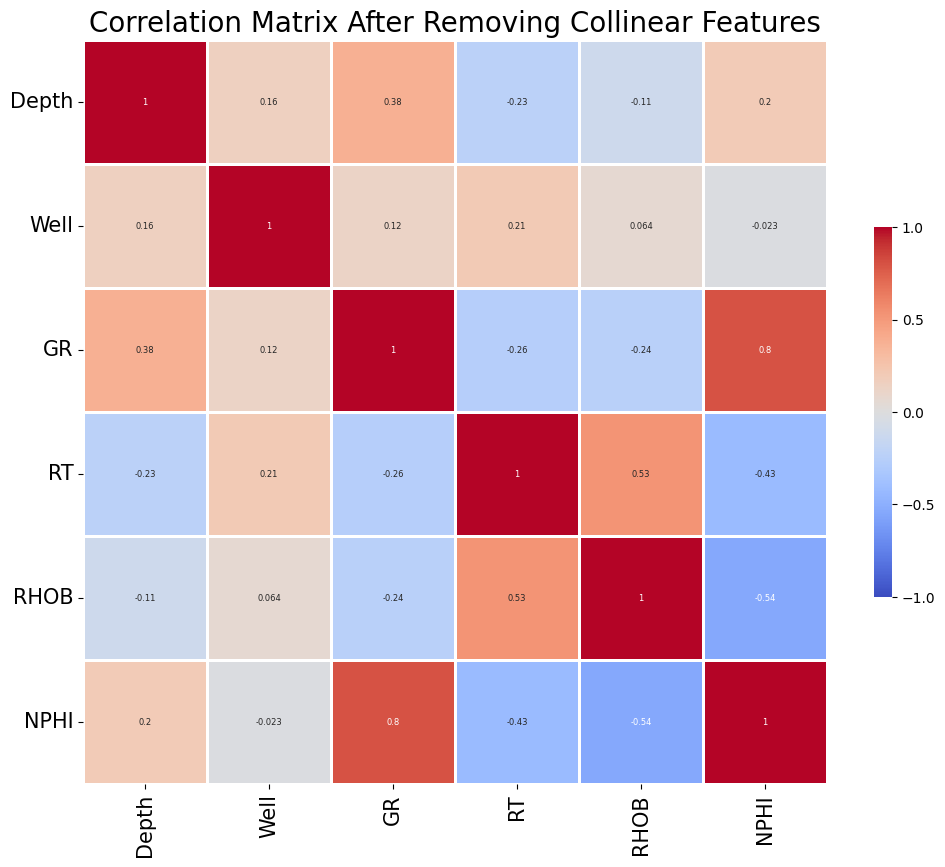

In [51]:
corr_matrix = X_train.corr(method = "pearson")

fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix, square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 6})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 15)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix After Removing Collinear Features", size = 20)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Removing correlated features from test data

In [52]:
X_test.drop(to_drop, axis=1, inplace=True)

In [53]:
X_train.head()

,Depth,Well,GR,RT,RHOB,NPHI
1857,0.931887,0.0,0.216644,0.133104,0.245737,0.428730
1434,0.683117,0.0,0.897539,0.282462,0.440440,0.875746
46,0.011060,0.0,0.664372,0.294187,0.148397,0.951022
1396,0.660496,0.0,0.946270,0.264286,0.481425,0.877878
573,0.178417,0.0,0.028099,0.933601,0.945445,0.026881


In [54]:
X_test.head()

,Depth,Well,GR,RT,RHOB,NPHI
474,0.496399,1.0,0.829877,0.549335,0.410789,0.931472
1227,0.556510,0.0,0.963130,0.835130,0.306479,0.915342
553,0.172793,0.0,0.015785,0.974406,0.963137,0.005563
367,0.436364,1.0,0.997886,0.601006,0.187479,0.986320
1282,0.591558,0.0,0.944804,0.666451,0.485485,0.884861


### Performing Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

X_train_s = scl.fit_transform(X_train) ## fit and transform the train

X_test_s = scl.transform(X_test)

### F-Classif and Mutual Info

In [56]:
from sklearn.feature_selection import f_classif
F,p = f_classif(X_train_s, y_train)

In [57]:
F

array([  68.8787796 ,    2.611641  , 1805.00726455,  220.23880905,
        520.53642079, 2241.45857149])

In [58]:
p

array([8.10372887e-043, 4.97840133e-002, 0.00000000e+000, 5.73966943e-127,
       1.47048748e-263, 0.00000000e+000])

Text(0.5, 0, 'features')

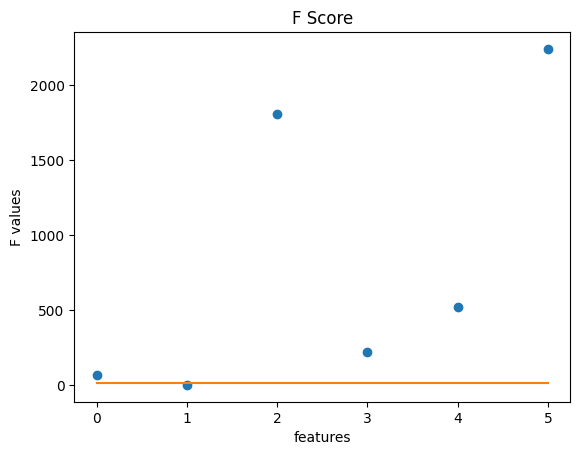

In [59]:
plt.figure()
plt.plot(F, 'o')
plt.plot(15*np.ones(len(F)))
plt.title('F Score')
plt.ylabel('F values')
plt.xlabel('features')

Text(0.5, 0, 'features')

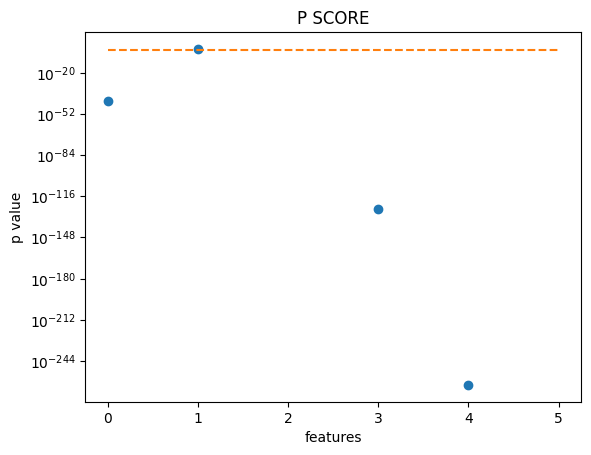

In [60]:
plt.figure()
plt.semilogy(p, 'o')
plt.semilogy(0.01*np.ones(len(p)), '--')
plt.title('P SCORE')
plt.ylabel('p value')
plt.xlabel('features')

In [61]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train_s, y_train)

Text(0.5, 0, 'features')

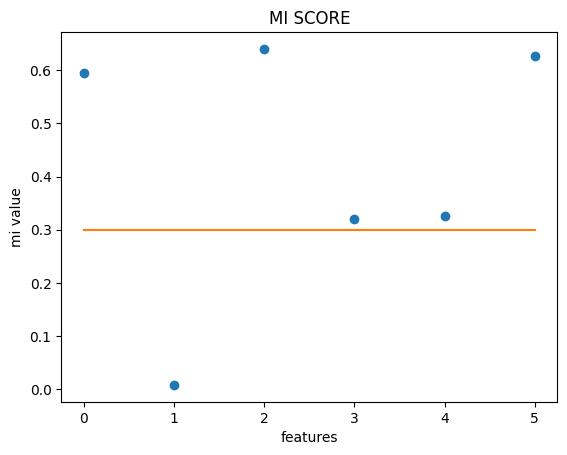

In [62]:
plt.figure()
plt.plot(mi, 'o')
plt.plot(0.3*np.ones(len(mi)))
plt.title('MI SCORE')
plt.ylabel('mi value')
plt.xlabel('features')

In [63]:
print('no. of significant features: {}'.format(len(p[((F>15)&(p<0.01))|(mi>0.3)])))

no. of significant features: 5


In [64]:
X_train_s.shape

(2540, 6)

In [65]:
X_train_s_r = X_train_s[:,(F > 15) | (mi > 0.3)]

In [66]:
X_train_s_r.shape

(2540, 5)

In [67]:
type(X_train_s_r)

numpy.ndarray

In [68]:
X_test_s_r = X_test_s[:,(F > 15) | (mi > 0.3)]

### Train 2 clustering techniques on features of the training dataset to generate cluster labels. Apply
### the clustering models on training and testing datasets. The two sets of cluster labels from the
### two techniques, respectively, should be used as 2 additional features. Do not leak information
### between training and testing datasets. Learn from train, apply on train and test. 

In [69]:
y_train.nunique()

4

In [70]:
y_test.nunique()

4

# So a total of 4 class labels

In [71]:
from sklearn.cluster import KMeans

In [72]:
kmeans = KMeans(n_clusters=4, random_state=10)

In [73]:
cluster_labels = kmeans.fit_predict(X_train_s_r)

C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [74]:
cluster_labels

array([1, 3, 2, ..., 2, 1, 1])

In [75]:
y_train

1857    2
1434    1
46      1
1396    1
573     0
       ..
776     2
854     0
43      2
1131    3
1811    2
Name: Facies, Length: 2540, dtype: int32

In [76]:
kmeans_cluster_labels_test = kmeans.predict(X_test_s_r)

In [77]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [78]:
agglomerative = AgglomerativeClustering(n_clusters=4)

In [79]:
agglomerative_cluster_labels = agglomerative.fit_predict(X_train_s_r)


In [80]:
agglomerative_cluster_labels_test = agglomerative.fit_predict(X_test_s_r)

In [81]:
X_train_s_r_c = np.column_stack((X_train_s_r, cluster_labels, agglomerative_cluster_labels))

# Add cluster labels as additional features to the testing dataset
X_test_s_r_c = np.column_stack((X_test_s_r, kmeans_cluster_labels_test, agglomerative_cluster_labels_test))

In [82]:
X_train_s_r_c.shape

(2540, 7)

In [83]:
X_train_s_r_c

array([[ 1.49551354, -0.98118375, -1.2704653 , ..., -0.2467953 ,
         1.        ,  3.        ],
       [ 0.63408915,  1.37660248, -0.75327805, ...,  1.30115335,
         3.        ,  0.        ],
       [-1.69306284,  0.56919574, -0.71267916, ...,  1.56182183,
         2.        ,  2.        ],
       ...,
       [-1.69488068, -0.55774789, -0.68805479, ...,  1.52001085,
         2.        ,  2.        ],
       [ 1.38724895,  0.80594456, -0.77216499, ...,  0.37988062,
         1.        ,  0.        ],
       [ 1.44355891, -0.11220206, -1.68960073, ...,  0.51393721,
         1.        ,  3.        ]])

In [84]:
type(X_train_s_r_c)

numpy.ndarray

#### Re-run the 4 top-performing techniques (not models) for 30 iterations. Each iteration will lead to an independent hyperparameter optimization. Ensure no random seed is used. Re-run the techniques and iterate to quantify the stochastic behavior of each technique. Instead of one memorization and generalization performance, you will generate distributions. 

In [86]:
from datetime import datetime

# Get the current time
current_time = datetime.now().time()

# Print the current time
print("Current Time:", current_time)

Current Time: 09:20:46.378998


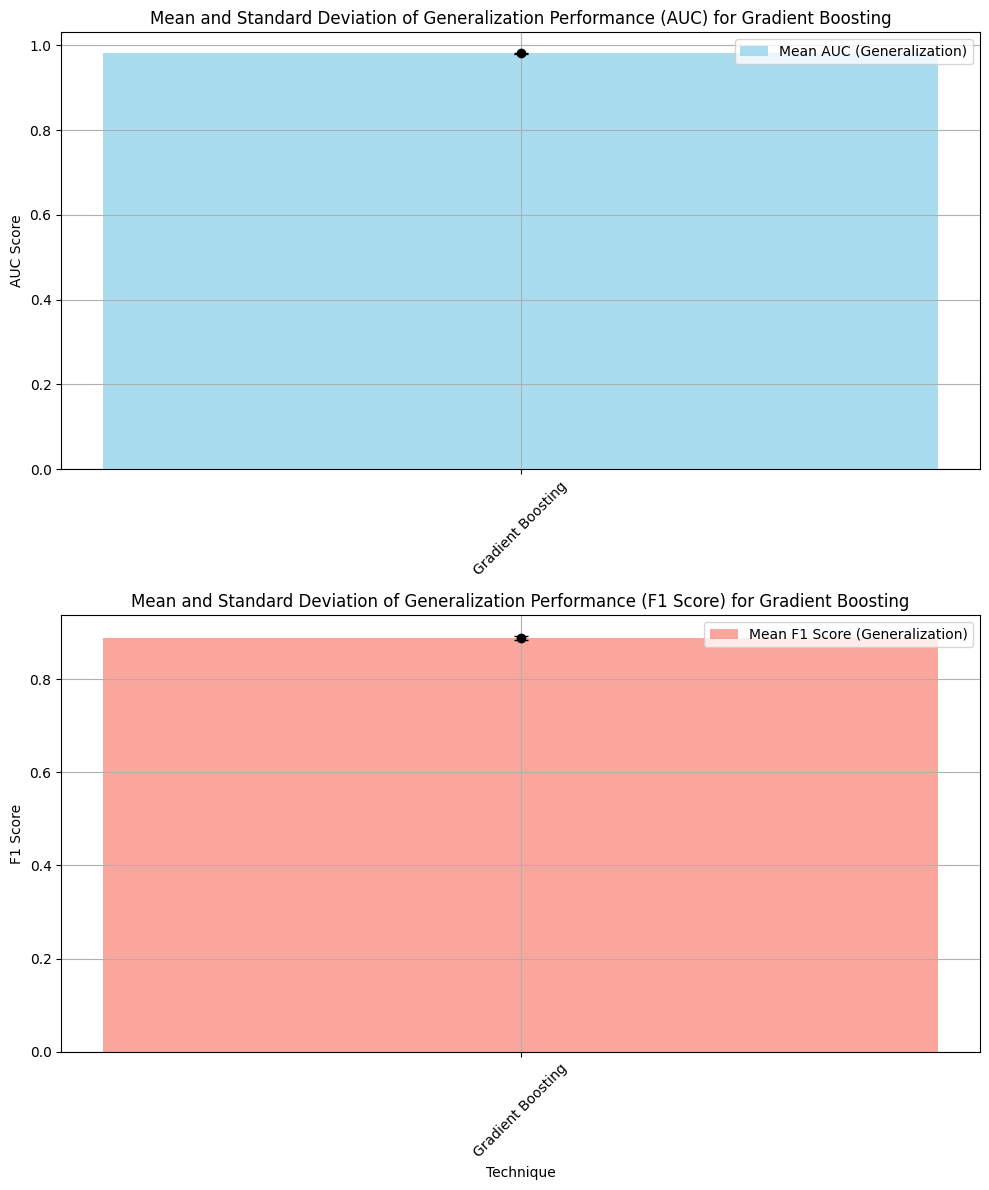

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 1],
    'max_depth': [5, 7]
}

# Initialize lists to store AUC and F1 scores for each iteration
auc_scores_train_gb = []
auc_scores_test_gb = []
f1_scores_train_gb = []
f1_scores_test_gb = []

# Re-run hyperparameter optimization for Gradient Boosting for 30 iterations
for i in range(30):
    # Technique: Gradient Boosting
    gb = GradientBoostingClassifier()
    grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='f1_weighted', verbose=0)
    grid_search_gb.fit(X_train_s_r_c, y_train)
    best_gb = grid_search_gb.best_estimator_
    gb_train_pred = best_gb.predict(X_train_s_r_c)
    gb_test_pred = best_gb.predict(X_test_s_r_c)
    
    # Calculate AUC scores
    auc_train_gb = roc_auc_score(label_binarize(y_train, classes=np.unique(y_train)), best_gb.predict_proba(X_train_s_r_c), average='weighted', multi_class='ovr')
    auc_test_gb = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), best_gb.predict_proba(X_test_s_r_c), average='weighted', multi_class='ovr')
    auc_scores_train_gb.append(auc_train_gb)
    auc_scores_test_gb.append(auc_test_gb)
    
    # Calculate F1 scores
    f1_train_gb = f1_score(y_train, gb_train_pred, average='weighted')
    f1_test_gb = f1_score(y_test, gb_test_pred, average='weighted')
    f1_scores_train_gb.append(f1_train_gb)
    f1_scores_test_gb.append(f1_test_gb)

# Calculate mean and standard deviation for AUC and F1 scores for Gradient Boosting
mean_auc_train_gb = np.mean(auc_scores_train_gb)
std_auc_train_gb = np.std(auc_scores_train_gb)
mean_auc_test_gb = np.mean(auc_scores_test_gb)
std_auc_test_gb = np.std(auc_scores_test_gb)

mean_f1_train_gb = np.mean(f1_scores_train_gb)
std_f1_train_gb = np.std(f1_scores_train_gb)
mean_f1_test_gb = np.mean(f1_scores_test_gb)
std_f1_test_gb = np.std(f1_scores_test_gb)

# Plot bar plot for mean and standard deviation of generalization performance (AUC and F1) for Gradient Boosting
plt.figure(figsize=(10, 12))

# Mean AUC scores
plt.subplot(2, 1, 1)
plt.bar(['Gradient Boosting'], [mean_auc_test_gb], yerr=[std_auc_test_gb], color='skyblue', alpha=0.7, capsize=5, label='Mean AUC (Generalization)')
# Add error bars for standard deviation
plt.errorbar('Gradient Boosting', mean_auc_test_gb, yerr=std_auc_test_gb, fmt='o', color='black')
plt.title('Mean and Standard Deviation of Generalization Performance (AUC) for Gradient Boosting')
plt.ylabel('AUC Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mean F1 scores
plt.subplot(2, 1, 2)
plt.bar(['Gradient Boosting'], [mean_f1_test_gb], yerr=[std_f1_test_gb], color='salmon', alpha=0.7, capsize=5, label='Mean F1 Score (Generalization)')
# Add error bars for standard deviation
plt.errorbar('Gradient Boosting', mean_f1_test_gb, yerr=std_f1_test_gb, fmt='o', color='black')
plt.title('Mean and Standard Deviation of Generalization Performance (F1 Score) for Gradient Boosting')
plt.xlabel('Technique')
plt.ylabel('F1 Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [90]:
from datetime import datetime

# Get the current time
current_time = datetime.now().time()

# Print the current time
print("Current Time:", current_time)

Current Time: 10:58:40.714253


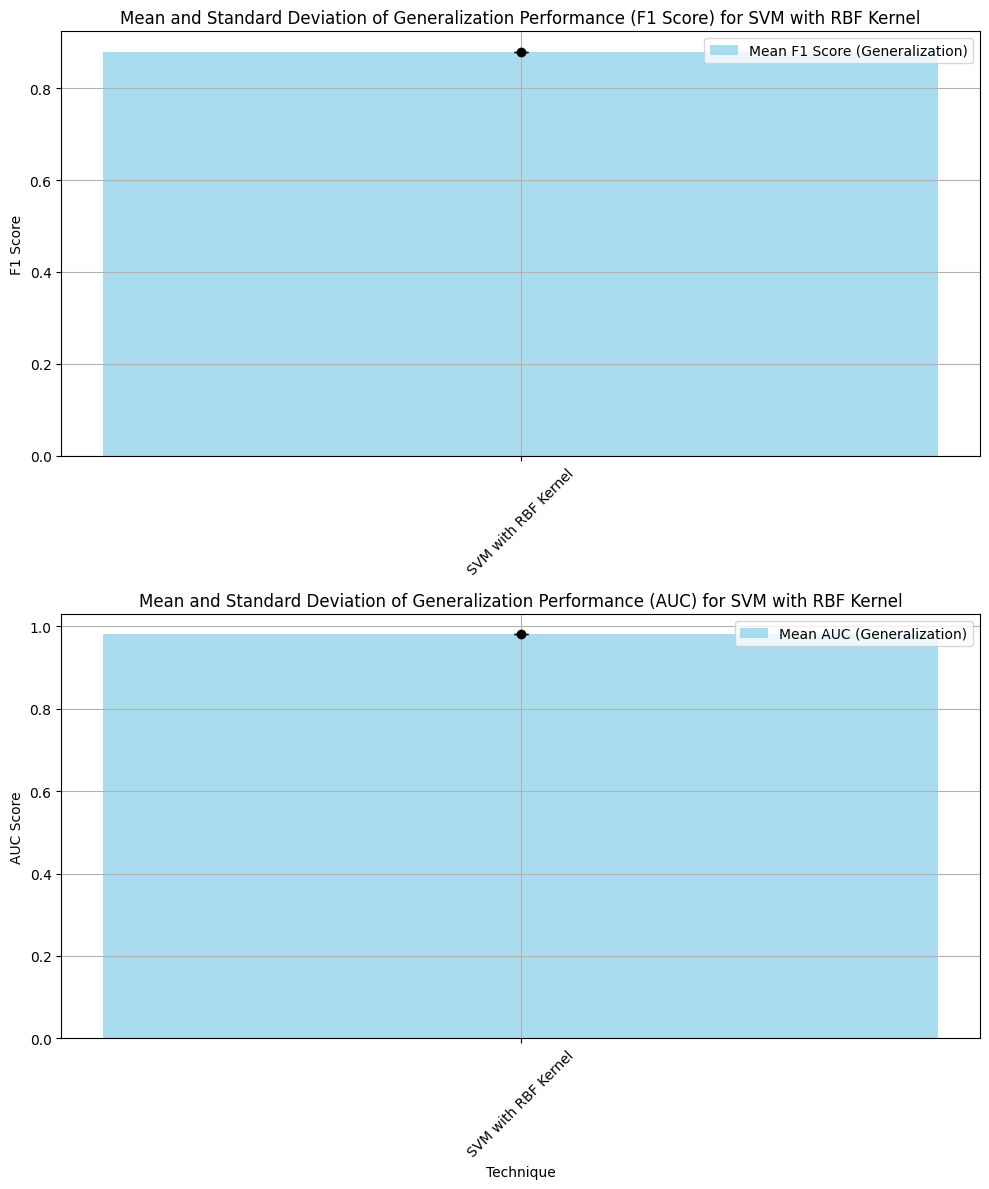

In [91]:
from sklearn.svm import SVC

# Define hyperparameter grid for SVM with RBF kernel
param_grid_svm_rbf = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize lists to store F1 scores and AUC scores for each iteration
f1_scores_train_svm_rbf = []
f1_scores_test_svm_rbf = []
auc_scores_train_svm_rbf = []
auc_scores_test_svm_rbf = []

# Re-run hyperparameter optimization for SVM with RBF kernel for 30 iterations
for i in range(30):
    # Technique: SVM with RBF kernel
    svm_rbf = SVC(kernel='rbf', probability=True)
    grid_search_svm_rbf = GridSearchCV(svm_rbf, param_grid_svm_rbf, cv=5, scoring='f1_weighted', verbose=0)
    grid_search_svm_rbf.fit(X_train_s_r_c, y_train)
    best_svm_rbf = grid_search_svm_rbf.best_estimator_
    svm_rbf_train_pred = best_svm_rbf.predict(X_train_s_r_c)
    svm_rbf_test_pred = best_svm_rbf.predict(X_test_s_r_c)
    
    # Calculate F1 scores
    f1_train_svm_rbf = f1_score(y_train, svm_rbf_train_pred, average='weighted')
    f1_test_svm_rbf = f1_score(y_test, svm_rbf_test_pred, average='weighted')
    f1_scores_train_svm_rbf.append(f1_train_svm_rbf)
    f1_scores_test_svm_rbf.append(f1_test_svm_rbf)
    
    # Calculate AUC scores
    auc_train_svm_rbf = roc_auc_score(label_binarize(y_train, classes=np.unique(y_train)), best_svm_rbf.predict_proba(X_train_s_r_c), average='weighted', multi_class='ovr')
    auc_test_svm_rbf = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), best_svm_rbf.predict_proba(X_test_s_r_c), average='weighted', multi_class='ovr')
    auc_scores_train_svm_rbf.append(auc_train_svm_rbf)
    auc_scores_test_svm_rbf.append(auc_test_svm_rbf)

# Calculate mean and standard deviation for F1 scores and AUC scores for SVM with RBF kernel
mean_f1_train_svm_rbf = np.mean(f1_scores_train_svm_rbf)
std_f1_train_svm_rbf = np.std(f1_scores_train_svm_rbf)
mean_f1_test_svm_rbf = np.mean(f1_scores_test_svm_rbf)
std_f1_test_svm_rbf = np.std(f1_scores_test_svm_rbf)

mean_auc_train_svm_rbf = np.mean(auc_scores_train_svm_rbf)
std_auc_train_svm_rbf = np.std(auc_scores_train_svm_rbf)
mean_auc_test_svm_rbf = np.mean(auc_scores_test_svm_rbf)
std_auc_test_svm_rbf = np.std(auc_scores_test_svm_rbf)

# Plot bar plot for mean and standard deviation of generalization performance (F1 score and AUC) for SVM with RBF kernel
plt.figure(figsize=(10, 12))

# Mean F1 scores
plt.subplot(2, 1, 1)
plt.bar(['SVM with RBF Kernel'], [mean_f1_test_svm_rbf], yerr=[std_f1_test_svm_rbf], color='skyblue', alpha=0.7, capsize=5, label='Mean F1 Score (Generalization)')
# Add error bars for standard deviation
plt.errorbar('SVM with RBF Kernel', mean_f1_test_svm_rbf, yerr=std_f1_test_svm_rbf, fmt='o', color='black')
plt.title('Mean and Standard Deviation of Generalization Performance (F1 Score) for SVM with RBF Kernel')
plt.ylabel('F1 Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mean AUC scores
plt.subplot(2, 1, 2)
plt.bar(['SVM with RBF Kernel'], [mean_auc_test_svm_rbf], yerr=[std_auc_test_svm_rbf], color='skyblue', alpha=0.7, capsize=5, label='Mean AUC (Generalization)')
# Add error bars for standard deviation
plt.errorbar('SVM with RBF Kernel', mean_auc_test_svm_rbf, yerr=std_auc_test_svm_rbf, fmt='o', color='black')
plt.title('Mean and Standard Deviation of Generalization Performance (AUC) for SVM with RBF Kernel')
plt.xlabel('Technique')
plt.ylabel('AUC Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [92]:
from datetime import datetime

# Get the current time
current_time = datetime.now().time()

# Print the current time
print("Current Time:", current_time)

Current Time: 11:03:48.429569


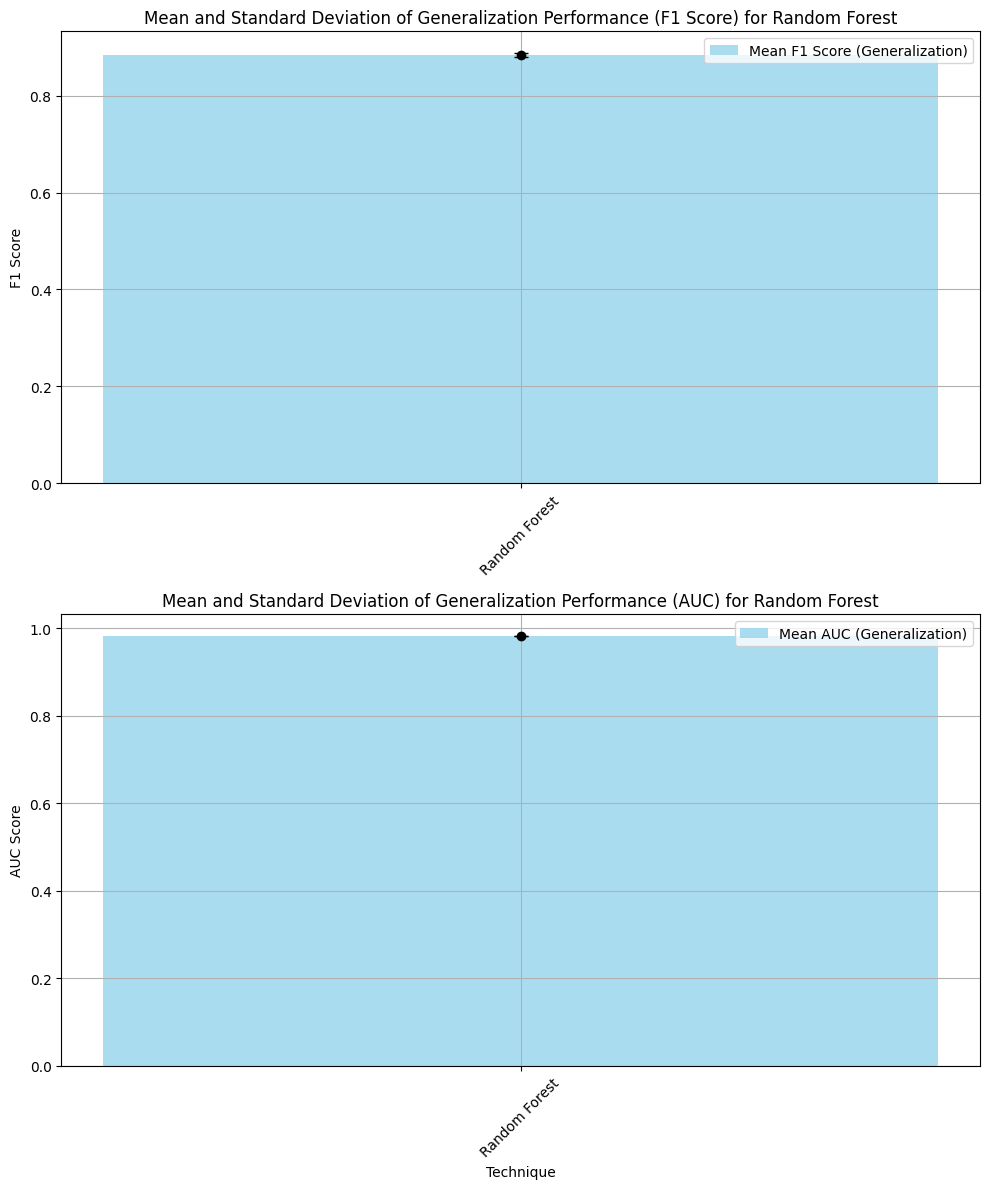

In [93]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize lists to store F1 scores and AUC scores for each iteration
f1_scores_train_rf = []
f1_scores_test_rf = []
auc_scores_train_rf = []
auc_scores_test_rf = []

# Re-run hyperparameter optimization for Random Forest for 30 iterations
for i in range(30):
    # Technique: Random Forest
    rf = RandomForestClassifier()
    grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_weighted', verbose=0)
    grid_search_rf.fit(X_train_s_r_c, y_train)
    best_rf = grid_search_rf.best_estimator_
    rf_train_pred = best_rf.predict(X_train_s_r_c)
    rf_test_pred = best_rf.predict(X_test_s_r_c)
    
    # Calculate F1 scores
    f1_train_rf = f1_score(y_train, rf_train_pred, average='weighted')
    f1_test_rf = f1_score(y_test, rf_test_pred, average='weighted')
    f1_scores_train_rf.append(f1_train_rf)
    f1_scores_test_rf.append(f1_test_rf)
    
    # Calculate AUC scores
    auc_train_rf = roc_auc_score(label_binarize(y_train, classes=np.unique(y_train)), best_rf.predict_proba(X_train_s_r_c), average='weighted', multi_class='ovr')
    auc_test_rf = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), best_rf.predict_proba(X_test_s_r_c), average='weighted', multi_class='ovr')
    auc_scores_train_rf.append(auc_train_rf)
    auc_scores_test_rf.append(auc_test_rf)

# Calculate mean and standard deviation for F1 scores and AUC scores for Random Forest
mean_f1_train_rf = np.mean(f1_scores_train_rf)
std_f1_train_rf = np.std(f1_scores_train_rf)
mean_f1_test_rf = np.mean(f1_scores_test_rf)
std_f1_test_rf = np.std(f1_scores_test_rf)

mean_auc_train_rf = np.mean(auc_scores_train_rf)
std_auc_train_rf = np.std(auc_scores_train_rf)
mean_auc_test_rf = np.mean(auc_scores_test_rf)
std_auc_test_rf = np.std(auc_scores_test_rf)

# Plot bar plot for mean and standard deviation of generalization performance (F1 score and AUC) for Random Forest
plt.figure(figsize=(10, 12))

# Mean F1 scores
plt.subplot(2, 1, 1)
plt.bar(['Random Forest'], [mean_f1_test_rf], yerr=[std_f1_test_rf], color='skyblue', alpha=0.7, capsize=5, label='Mean F1 Score (Generalization)')
# Add error bars for standard deviation
plt.errorbar('Random Forest', mean_f1_test_rf, yerr=std_f1_test_rf, fmt='o', color='black')
plt.title('Mean and Standard Deviation of Generalization Performance (F1 Score) for Random Forest')
plt.ylabel('F1 Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mean AUC scores
plt.subplot(2, 1, 2)
plt.bar(['Random Forest'], [mean_auc_test_rf], yerr=[std_auc_test_rf], color='skyblue', alpha=0.7, capsize=5, label='Mean AUC (Generalization)')
# Add error bars for standard deviation
plt.errorbar('Random Forest', mean_auc_test_rf, yerr=std_auc_test_rf, fmt='o', color='black')
plt.title('Mean and Standard Deviation of Generalization Performance (AUC) for Random Forest')
plt.xlabel('Technique')
plt.ylabel('AUC Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [94]:
from datetime import datetime

# Get the current time
current_time = datetime.now().time()

# Print the current time
print("Current Time:", current_time)

Current Time: 11:23:15.288313


In [96]:
f1_scores_test_rf

[0.8862198065715252,
 0.885489211651325,
 0.8842104819245747,
 0.8799603322572971,
 0.8779048334084473,
 0.8850622906305105,
 0.8826350474098935,
 0.8891957474857529,
 0.8811288057717007,
 0.8781850894948745,
 0.8840697850116337,
 0.8855298366617551,
 0.8893826630968027,
 0.872409887763691,
 0.8821121399293979,
 0.8809320104558249,
 0.8875000873785424,
 0.8842269292446356,
 0.8880103799707765,
 0.8820176309862604,
 0.881525032728736,
 0.8899655263343765,
 0.8820054068076665,
 0.8834198315269569,
 0.8877346230462111,
 0.881683365722418,
 0.8888125952546919,
 0.87947138649393,
 0.8805555676653729,
 0.8954198954521315]

In [97]:
from datetime import datetime

# Get the current time
current_time = datetime.now().time()

# Print the current time
print("Current Time:", current_time)

Current Time: 11:23:15.458728


C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Gopala Kala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations

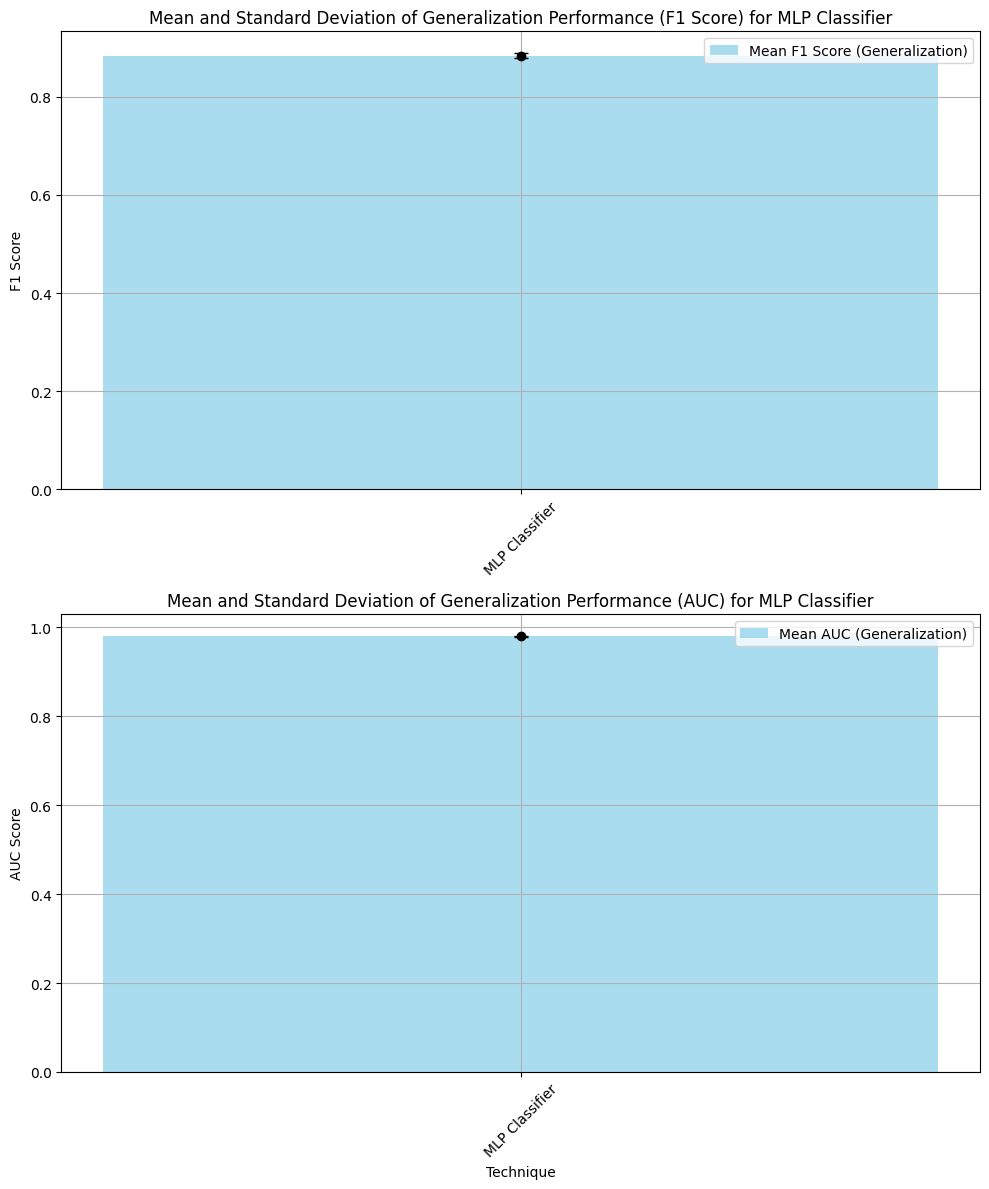

In [98]:
from sklearn.neural_network import MLPClassifier

# Define hyperparameter grid for MLP classifier
param_grid_mlp = {
    'hidden_layer_sizes': [(100,100), (50, 50)],
    'activation': ['tanh', 'logistic'],
    'alpha': [0.001, 0.01]
}

# Initialize lists to store F1 scores and AUC scores for each iteration
f1_scores_train_mlp = []
f1_scores_test_mlp = []
auc_scores_train_mlp = []
auc_scores_test_mlp = []

# Re-run hyperparameter optimization for MLP classifier for 30 iterations
for i in range(30):
    # Technique: MLP classifier
    mlp = MLPClassifier(max_iter=1000)
    grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='f1_weighted', verbose=0)
    grid_search_mlp.fit(X_train_s_r_c, y_train)
    best_mlp = grid_search_mlp.best_estimator_
    mlp_train_pred = best_mlp.predict(X_train_s_r_c)
    mlp_test_pred = best_mlp.predict(X_test_s_r_c)
    
    # Calculate F1 scores
    f1_train_mlp = f1_score(y_train, mlp_train_pred, average='weighted')
    f1_test_mlp = f1_score(y_test, mlp_test_pred, average='weighted')
    f1_scores_train_mlp.append(f1_train_mlp)
    f1_scores_test_mlp.append(f1_test_mlp)
    
    # Calculate AUC scores
    auc_train_mlp = roc_auc_score(label_binarize(y_train, classes=np.unique(y_train)), best_mlp.predict_proba(X_train_s_r_c), average='weighted', multi_class='ovr')
    auc_test_mlp = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), best_mlp.predict_proba(X_test_s_r_c), average='weighted', multi_class='ovr')
    auc_scores_train_mlp.append(auc_train_mlp)
    auc_scores_test_mlp.append(auc_test_mlp)

# Calculate mean and standard deviation for F1 scores and AUC scores for MLP classifier
mean_f1_train_mlp = np.mean(f1_scores_train_mlp)
std_f1_train_mlp = np.std(f1_scores_train_mlp)
mean_f1_test_mlp = np.mean(f1_scores_test_mlp)
std_f1_test_mlp = np.std(f1_scores_test_mlp)

mean_auc_train_mlp = np.mean(auc_scores_train_mlp)
std_auc_train_mlp = np.std(auc_scores_train_mlp)
mean_auc_test_mlp = np.mean(auc_scores_test_mlp)
std_auc_test_mlp = np.std(auc_scores_test_mlp)

# Plot bar plot for mean and standard deviation of generalization performance (F1 score and AUC) for MLP classifier
plt.figure(figsize=(10, 12))

# Mean F1 scores
plt.subplot(2, 1, 1)
plt.bar(['MLP Classifier'], [mean_f1_test_mlp], yerr=[std_f1_test_mlp], color='skyblue', alpha=0.7, capsize=5, label='Mean F1 Score (Generalization)')
# Add error bars for standard deviation
plt.errorbar('MLP Classifier', mean_f1_test_mlp, yerr=std_f1_test_mlp, fmt='o', color='black')
plt.title('Mean and Standard Deviation of Generalization Performance (F1 Score) for MLP Classifier')
plt.ylabel('F1 Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mean AUC scores
plt.subplot(2, 1, 2)
plt.bar(['MLP Classifier'], [mean_auc_test_mlp], yerr=[std_auc_test_mlp], color='skyblue', alpha=0.7, capsize=5, label='Mean AUC (Generalization)')
# Add error bars for standard deviation
plt.errorbar('MLP Classifier', mean_auc_test_mlp, yerr=std_auc_test_mlp, fmt='o', color='black')
plt.title('Mean and Standard Deviation of Generalization Performance (AUC) for MLP Classifier')
plt.xlabel('Technique')
plt.ylabel('AUC Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [99]:
from datetime import datetime

# Get the current time
current_time = datetime.now().time()

# Print the current time
print("Current Time:", current_time)

Current Time: 15:17:35.188411


#### Show the distribution of generalization performance for each technique as a subplot in a 2-by-2 plot.

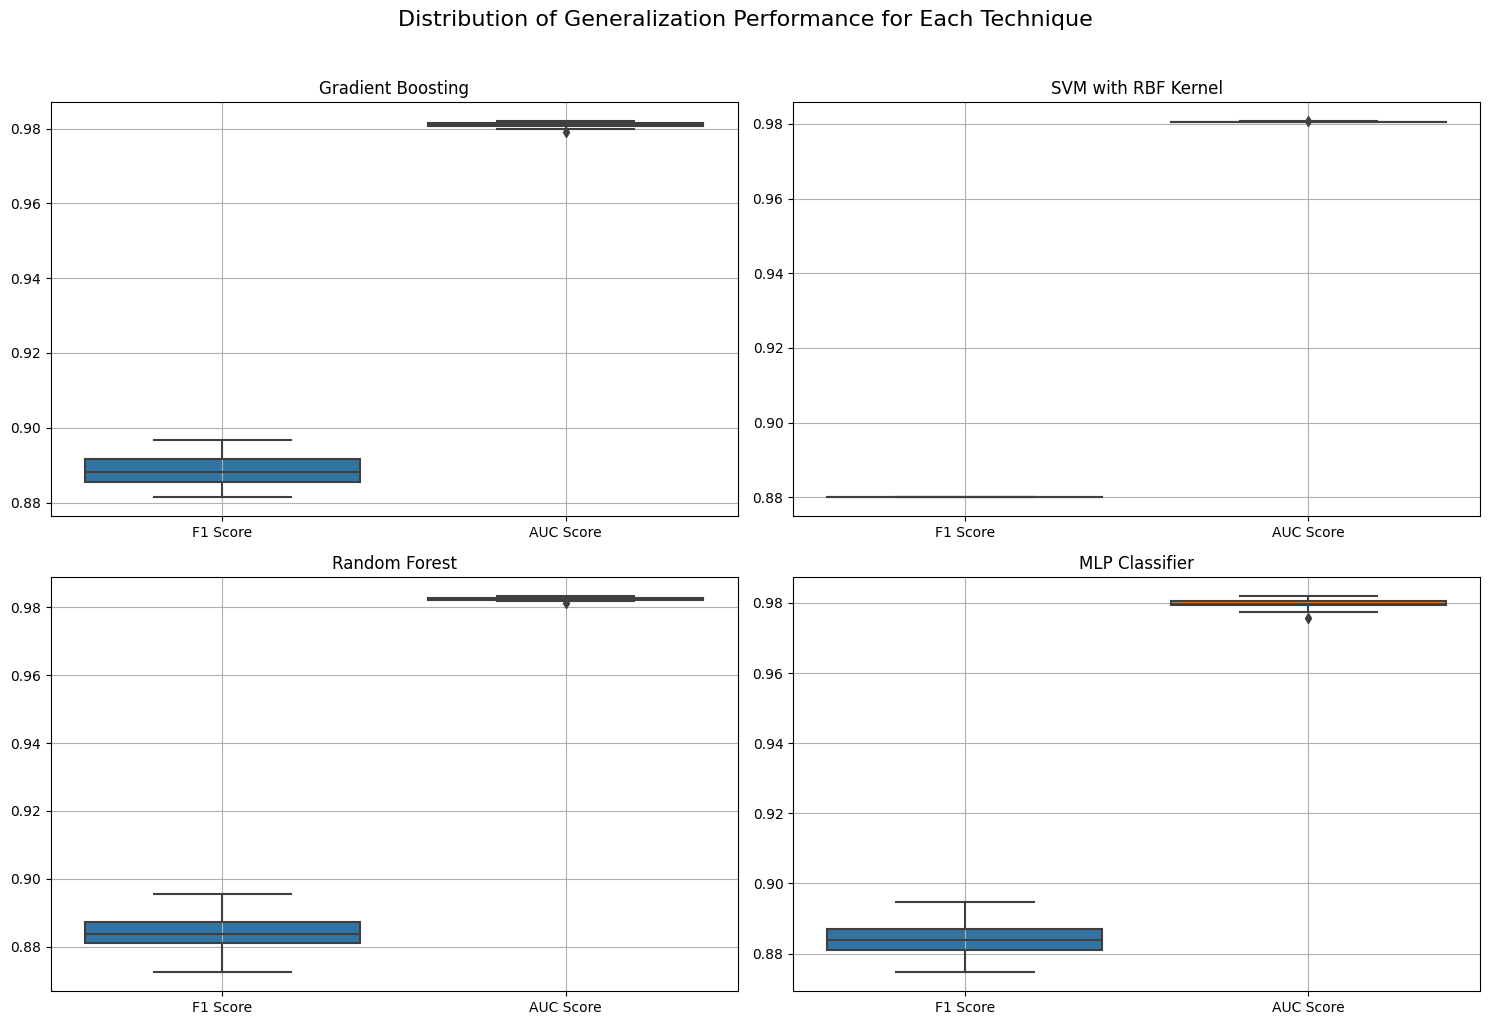

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
techniques = ['Gradient Boosting', 'SVM with RBF Kernel', 'Random Forest', 'MLP Classifier']
f1_scores = [f1_scores_test_gb, f1_scores_test_svm_rbf, f1_scores_test_rf, f1_scores_test_mlp]
auc_scores = [auc_scores_test_gb, auc_scores_test_svm_rbf, auc_scores_test_rf, auc_scores_test_mlp]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Iterate through each technique and plot its F1 and AUC scores
for i, (tech, f1, auc) in enumerate(zip(techniques, f1_scores, auc_scores)):
    # Calculate position in grid
    row = i // 2
    col = i % 2
    sns.boxplot(data=[f1, auc], ax=axs[row, col])
    axs[row, col].set_xticklabels(['F1 Score', 'AUC Score'])
    axs[row, col].set_title(f'{tech}')
    axs[row, col].grid(True)

# Set overall title
plt.suptitle('Distribution of Generalization Performance for Each Technique', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


#### Generate a bar plot to present the mean and standard deviation of memorization performance for each technique. Use F1 score as metric.

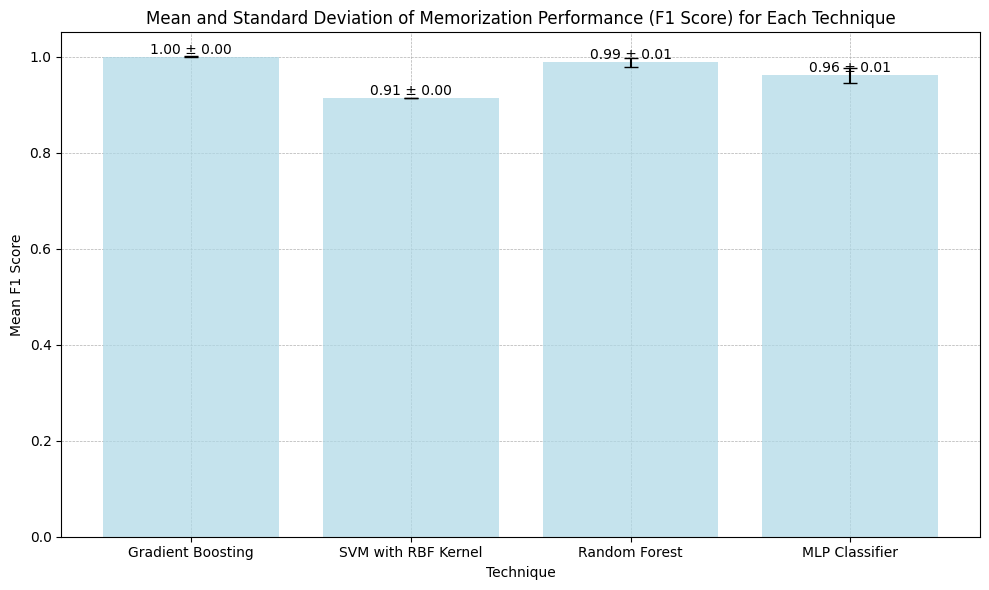

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
techniques = ['Gradient Boosting', 'SVM with RBF Kernel', 'Random Forest', 'MLP Classifier']
means = [np.mean(f1_scores_train_gb), np.mean(f1_scores_train_svm_rbf), np.mean(f1_scores_train_rf), np.mean(f1_scores_train_mlp)]
stds = [np.std(f1_scores_train_gb), np.std(f1_scores_train_svm_rbf), np.std(f1_scores_train_rf), np.std(f1_scores_train_mlp)]

fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot
bars = ax.bar(techniques, means, yerr=stds, capsize=5, color='lightblue', alpha=0.7)

# Add text annotations
for bar, mean, std in zip(bars, means, stds):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mean:.2f} ± {std:.2f}',
            ha='center', va='bottom', color='black', fontsize=10)

# Setting labels and title
ax.set_xlabel('Technique')
ax.set_ylabel('Mean F1 Score')
ax.set_title('Mean and Standard Deviation of Memorization Performance (F1 Score) for Each Technique')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Display the plot
plt.tight_layout()
plt.show()


#### Generate a bar plot to present the mean and standard deviation of generalization performance for each technique. Use F1 score as metric.

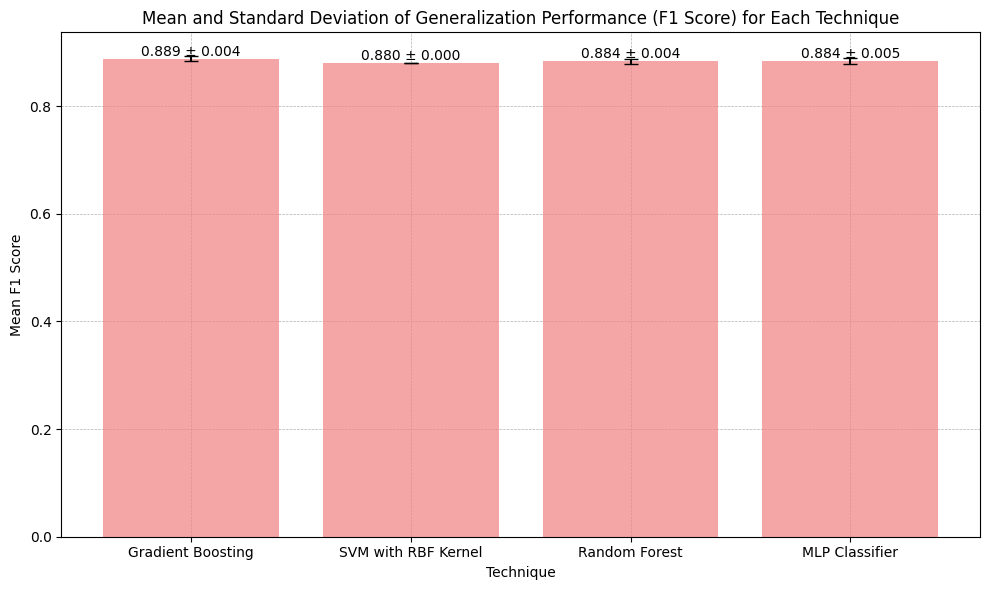

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Names of the techniques you evaluated
techniques = ['Gradient Boosting', 'SVM with RBF Kernel', 'Random Forest', 'MLP Classifier']

# Assuming these variables hold the F1 scores for testing dataset
means = [
    np.mean(f1_scores_test_gb),
    np.mean(f1_scores_test_svm_rbf),
    np.mean(f1_scores_test_rf),
    np.mean(f1_scores_test_mlp)
]
stds = [
    np.std(f1_scores_test_gb),
    np.std(f1_scores_test_svm_rbf),
    np.std(f1_scores_test_rf),
    np.std(f1_scores_test_mlp)
]

fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot with error bars
bars = ax.bar(techniques, means, yerr=stds, capsize=5, color='lightcoral', alpha=0.7)

# Add text annotations with mean and standard deviation
for bar, mean, std in zip(bars, means, stds):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mean:.3f} ± {std:.3f}',
            ha='center', va='bottom', color='black', fontsize=10)

# Setting labels and title
ax.set_xlabel('Technique')
ax.set_ylabel('Mean F1 Score')
ax.set_title('Mean and Standard Deviation of Generalization Performance (F1 Score) for Each Technique')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Display the plot
plt.tight_layout()
plt.show()


#### Generate a bar plot to present the mean and standard deviation of generalization performance for each technique. Use AUC score as metric.

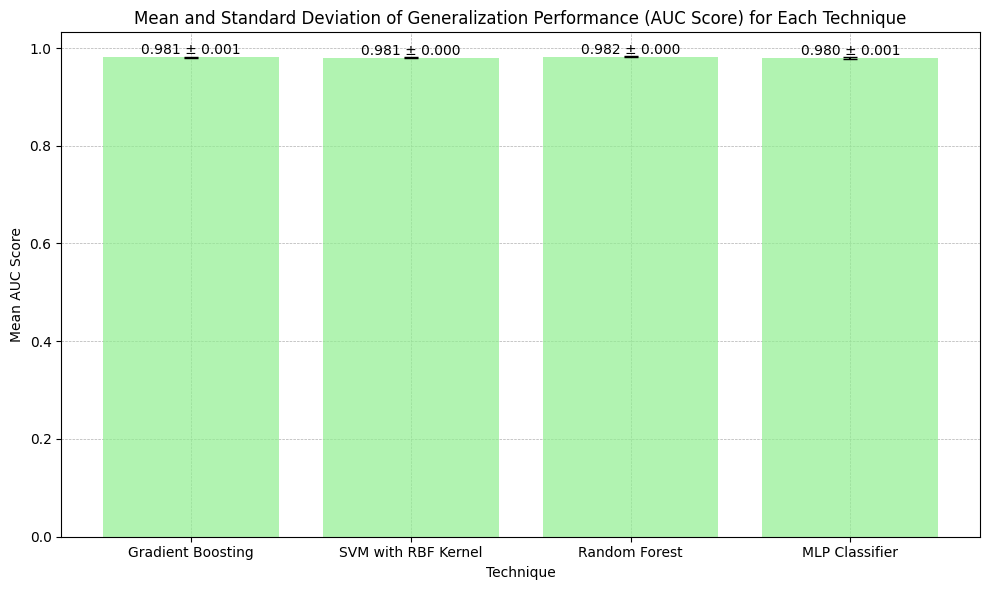

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Names of the techniques you evaluated
techniques = ['Gradient Boosting', 'SVM with RBF Kernel', 'Random Forest', 'MLP Classifier']

# Assuming these variables hold the AUC scores for the testing dataset
means = [
    np.mean(auc_scores_test_gb),
    np.mean(auc_scores_test_svm_rbf),
    np.mean(auc_scores_test_rf),
    np.mean(auc_scores_test_mlp)
]
stds = [
    np.std(auc_scores_test_gb),
    np.std(auc_scores_test_svm_rbf),
    np.std(auc_scores_test_rf),
    np.std(auc_scores_test_mlp)
]

fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot with error bars
bars = ax.bar(techniques, means, yerr=stds, capsize=5, color='lightgreen', alpha=0.7)

# Add text annotations with mean and standard deviation
for bar, mean, std in zip(bars, means, stds):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mean:.3f} ± {std:.3f}',
            ha='center', va='bottom', color='black', fontsize=10)

# Setting labels and title
ax.set_xlabel('Technique')
ax.set_ylabel('Mean AUC Score')
ax.set_title('Mean and Standard Deviation of Generalization Performance (AUC Score) for Each Technique')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Display the plot
plt.tight_layout()
plt.show()


### Most reliable technique: 
#### From the above graphs we can see that for Gradient Boosting, The memorization score is a perfect one and the generalization score is around 0.889 (plus/minus 0.04) which is higher compared to the other scores of different classifiers used. Also it has a higher AUC of 0.981. Hence we can conclude that Gradient Boosting is a better technique for Facies classification.